In [30]:
import numpy as np
import pandas as pd
import os
from utils import *
import json

In [93]:
import datetime as dt
import matplotlib.pyplot as plt

In [32]:
path=!pwd
path=path[0]
variableList=pd.read_csv(os.path.join(os.path.join(path, os.pardir),'myvariablesList.csv'),header=None).values.tolist()
patientHandler=PatientHandler(variableList)
path=patientHandler.dataPath
patientHandler.gen_list()


In [33]:

item_dic=createItemPositionDict('/home/shuying/survival/benchmark/mimic3-benchmarks/myvariablesList.csv')   

'2101-10-20 16:40:00,2101-10-20 16:49:00,2101-10-20 17:58:00,2101-10-20 18:00:00,2101-10-20 18:30:00,2101-10-20 18:45:00,2101-10-20 19:00:00,2101-10-20 19:12:00,2101-10-20 19:14:00,2101-10-20 19:15:00,2101-10-20 19:26:00,2101-10-20 19:30:00,2101-10-20 19:45:00,2101-10-20 19:59:00,2101-10-20 20:00:00,2101-10-20 20:04:00,2101-10-20 20:15:00,2101-10-20 20:30:00,2101-10-20 20:45:00,2101-10-20 21:00:00,2101-10-20 21:15:00,2101-10-20 21:30:00,2101-10-20 21:45:00,2101-10-20 21:51:00,2101-10-20 22:00:00,2101-10-20 22:15:00,2101-10-20 22:30:00,2101-10-20 22:45:00,2101-10-20 23:00:00,2101-10-20 23:15:00,2101-10-20 23:45:00,2101-10-21 00:00:00,2101-10-21 00:28:00,2101-10-21 00:42:00,2101-10-21 01:00:00,2101-10-21 01:46:00,2101-10-21 01:53:00,2101-10-21 02:00:00,2101-10-21 03:00:00,2101-10-21 03:09:00,2101-10-21 03:30:00,2101-10-21 03:57:00,2101-10-21 04:00:00,2101-10-21 04:15:00,2101-10-21 05:00:00,2101-10-21 06:00:00,2101-10-21 07:00:00,2101-10-21 07:05:00,2101-10-21 07:34:00,2101-10-21 08:00:00

In [98]:
def showpatient(i):
    p=patientHandler.get_one(i)
    matrix=np.load(p+'/variables.npy',allow_pickle=True)

    temp=pd.read_csv(os.path.join(p,'stays.csv'))
    intime=temp['INTIME'][0] # Currently only consider the first ICU STAY #TODO:
    del temp
    intime=dt.datetime.fromisoformat(intime)
    with open(p+'/timeList.txt','r') as f:
        timeList=f.readline()
    timeList=timeList.split(',')
    timeList.pop()
    timeList=[dt.datetime.fromisoformat(i)-intime for i in timeList]
    inflag=0
    for (i,time) in enumerate(timeList):    
        delta=(time.total_seconds())/3600
        if delta>48:
            endflag=i
            break
        if delta>0 and inflag==0: inflag=i

        del delta

    s=matrix.shape
    matrix48=np.zeros((endflag-inflag,s[1]+1))
    matrix48[:,1:]=matrix[inflag:endflag,:]
    matrix48[:,0]=[i.total_seconds()/3600 for i in timeList[inflag:endflag]]
    plt.imshow(matrix48)

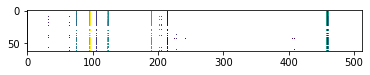

In [113]:
showpatient(29992)

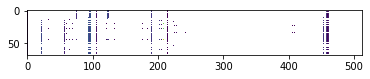

In [108]:
showpatient(29995)

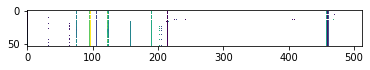

In [111]:
showpatient(29999)

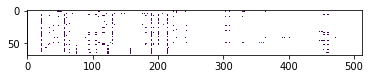

In [109]:
showpatient(29989)

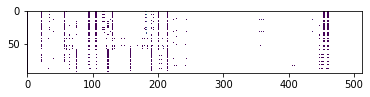

In [117]:
showpatient(29888)

In [5]:
path='/home/shuying/survival/benchmark/mimic3-benchmarks/data/root/'+'itemType.csv'


In [6]:
path

'/home/shuying/survival/benchmark/mimic3-benchmarks/data/root/itemType.csv'

In [7]:
df=pd.read_csv(path)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 2


In [11]:
df

,itemID,isCategory
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,25,1
6,27,1
7,31,1
8,32,1
9,36,1
